In [30]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Decodificación de las variables

In [31]:
# Nombres de las columnas según la documentación (german.doc)
column_names = [
    "checking_status", "duration", "credit_history", "purpose", 
    "credit_amount", "savings_status", "employment", "installment_commitment", 
    "personal_status", "other_parties", "residence_since", "property_magnitude", 
    "age", "other_payment_plans", "housing", "existing_credits", 
    "job", "num_dependents", "own_telephone", "foreign_worker", 
    "class" # Esta es la variable objetivo (1 = Good, 2 = Bad)
]

# Carga del dataframe
# sep=' ' indica que el separador es un espacio
df = pd.read_csv('../../data/german.data', sep=' ', header=None, names=column_names)

# Vistazo rápido
print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (1000, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


# Análisis del Target

In [32]:
# Mapeo para que 1 sea el evento negativo (Default/Bad) y 0 sea el positivo (Good)
# Esto facilita la interpretación: "Probabilidad de Default"
df['target'] = df['class'].map({1: 0, 2: 1})

# Eliminamos la columna original para no duplicar
df = df.drop('class', axis=1)

# Verificamos el balance de clases
print("Distribución de la variable objetivo (0=Good, 1=Bad):")
print(df['target'].value_counts(normalize=True))

Distribución de la variable objetivo (0=Good, 1=Bad):
target
0    0.7
1    0.3
Name: proportion, dtype: float64


# Decoding de los datos

In [33]:
# Diccionario de mapeo basado en la documentación de UCI
decoding_map = {
    "checking_status": {
        'A11': '< 0 DM', 'A12': '0 <= x < 200 DM', 'A13': '>= 200 DM / Salary', 'A14': 'No checking'
    },
    "credit_history": {
        'A30': 'No credits/All paid', 'A31': 'All paid at bank', 'A32': 'Existing paid', 
        'A33': 'Delayed previously', 'A34': 'Critical/Other'
    },
    "purpose": {
        'A40': 'Car (new)', 'A41': 'Car (used)', 'A42': 'Furniture/Equipment', 
        'A43': 'Radio/TV', 'A44': 'Domestic appliances', 'A45': 'Repairs', 
        'A46': 'Education', 'A47': 'Vacation', 'A48': 'Retraining', 
        'A49': 'Business', 'A410': 'Others'
    },
    "savings_status": {
        'A61': '< 100 DM', 'A62': '100 <= x < 500 DM', 'A63': '500 <= x < 1000 DM', 
        'A64': '>= 1000 DM', 'A65': 'Unknown/No savings'
    },
    "employment": {
        'A71': 'Unemployed', 'A72': '< 1 year', 'A73': '1 <= x < 4 years', 
        'A74': '4 <= x < 7 years', 'A75': '>= 7 years'
    },
    "personal_status": {
        'A91': 'Male: Divorced/Separated', 'A92': 'Female: Divorced/Separated/Married', 
        'A93': 'Male: Single', 'A94': 'Male: Married/Widowed', 'A95': 'Female: Single'
    },
    "other_parties": {
        'A101': 'None', 'A102': 'Co-applicant', 'A103': 'Guarantor'
    },
    "property_magnitude": {
        'A121': 'Real Estate', 'A122': 'Life Insurance/Building Society', 
        'A123': 'Car or Other', 'A124': 'Unknown/No Property'
    },
    "other_payment_plans": {
        'A141': 'Bank', 'A142': 'Stores', 'A143': 'None'
    },
    "housing": {
        'A151': 'Rent', 'A152': 'Own', 'A153': 'For Free'
    },
    "job": {
        'A171': 'Unemployed/Unskilled (non-res)', 'A172': 'Unskilled (resident)', 
        'A173': 'Skilled Employee/Official', 'A174': 'Mgmt/Self-employed/Highly Qualified'
    },
    "own_telephone": {
        'A191': 'None', 'A192': 'Yes'
    },
    "foreign_worker": {
        'A201': 'Yes', 'A202': 'No'
    }
}

# Aplicamos el reemplazo
df.replace(decoding_map, inplace=True)

# Verificamos cómo se ve ahora
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,< 0 DM,6,Critical/Other,Radio/TV,1169,Unknown/No savings,>= 7 years,4,Male: Single,None,4,Real Estate,67,None,Own,2,Skilled Employee/Official,1,Yes,Yes,0
1,0 <= x < 200 DM,48,Existing paid,Radio/TV,5951,< 100 DM,1 <= x < 4 years,2,Female: Divorced/Separated/Married,None,2,Real Estate,22,None,Own,1,Skilled Employee/Official,1,None,Yes,1
2,No checking,12,Critical/Other,Education,2096,< 100 DM,4 <= x < 7 years,2,Male: Single,None,3,Real Estate,49,None,Own,1,Unskilled (resident),2,None,Yes,0
3,< 0 DM,42,Existing paid,Furniture/Equipment,7882,< 100 DM,4 <= x < 7 years,2,Male: Single,Guarantor,4,Life Insurance/Building Society,45,None,For Free,1,Skilled Employee/Official,2,None,Yes,0
4,< 0 DM,24,Delayed previously,Car (new),4870,< 100 DM,1 <= x < 4 years,3,Male: Single,None,4,Unknown/No Property,53,None,For Free,2,Skilled Employee/Official,2,None,Yes,1


# Sanidad de los datos e Hipótesis de Negocio

In [34]:
# 1. Revisión General de Calidad
print("--- Auditoría de Datos ---")
print(f"Duplicados exactos: {df.duplicated().sum()}")
print(f"Valores Nulos por columna:\n{df.isnull().sum()[df.isnull().sum() > 0]}") # Solo muestra si hay nulos

# 2. Revisión de Coherencia Numérica
# Nos interesa ver si 'age', 'credit_amount' o 'duration' tienen sentido (ej: edad negativa o 0)
numerical_cols = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
print("\n--- Estadísticos de Variables Numéricas ---")
# Transponemos (.T) para leerlo mejor
print(df[numerical_cols].describe().T[['min', 'max', 'mean', '50%']])

--- Auditoría de Datos ---
Duplicados exactos: 0
Valores Nulos por columna:
Series([], dtype: int64)

--- Estadísticos de Variables Numéricas ---
                          min      max      mean     50%
duration                  4.0     72.0    20.903    18.0
credit_amount           250.0  18424.0  3271.258  2319.5
installment_commitment    1.0      4.0     2.973     3.0
residence_since           1.0      4.0     2.845     3.0
age                      19.0     75.0    35.546    33.0
existing_credits          1.0      4.0     1.407     1.0
num_dependents            1.0      2.0     1.155     1.0


/var/folders/15/59msbdnd3179pytbr6876h9m0000gn/T/ipykernel_31099/3924004008.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='target', data=temp, palette='Reds_r')


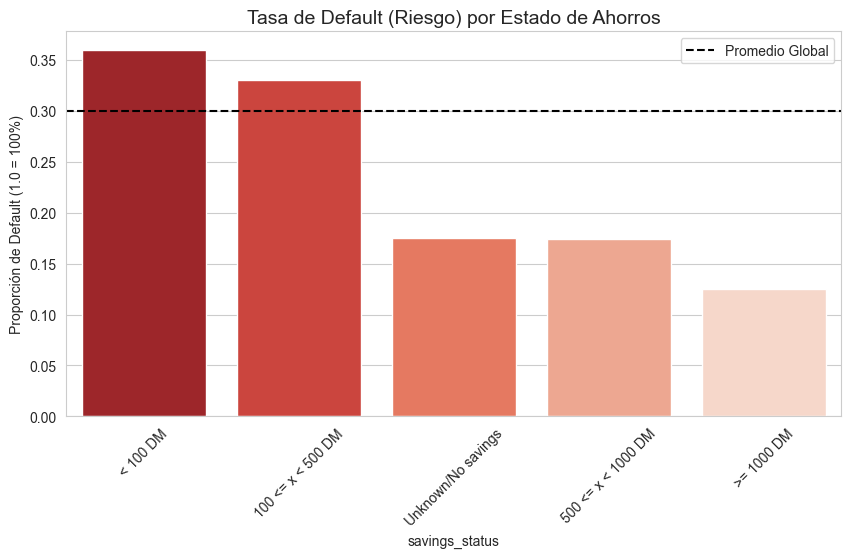

/var/folders/15/59msbdnd3179pytbr6876h9m0000gn/T/ipykernel_31099/3924004008.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='target', data=temp, palette='Reds_r')


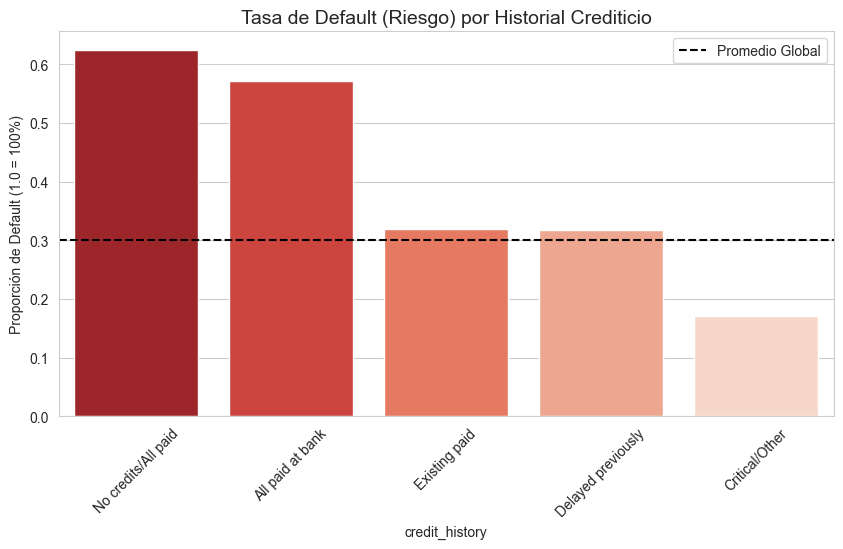

/var/folders/15/59msbdnd3179pytbr6876h9m0000gn/T/ipykernel_31099/3924004008.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, ax=ax[0], palette='Set2')
/var/folders/15/59msbdnd3179pytbr6876h9m0000gn/T/ipykernel_31099/3924004008.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='duration', data=df, ax=ax[1], palette='Set2')


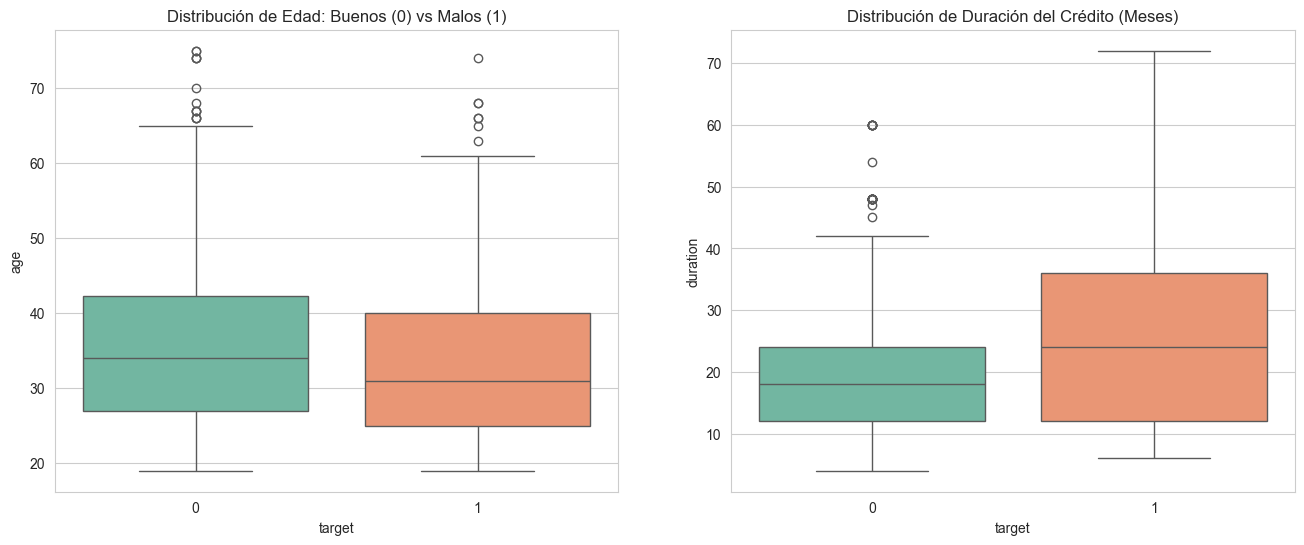

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set_style("whitegrid")

# Función auxiliar para graficar tasas de default (Crucial para el negocio)
def plot_default_rate(df, col, title):
    # Calculamos el % de Default (target=1) por categoría
    temp = df.groupby(col)['target'].mean().sort_values(ascending=False).reset_index()
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='target', data=temp, palette='Reds_r')
    plt.title(f'Tasa de Default (Riesgo) por {title}', fontsize=14)
    plt.ylabel('Proporción de Default (1.0 = 100%)')
    plt.axhline(y=df['target'].mean(), color='black', linestyle='--', label='Promedio Global')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# --- HIPÓTESIS 1: Ahorros vs Riesgo ---
# Esperamos que 'Unknown/No savings' o '< 100 DM' tengan las barras más altas
# "El que no tiene ahorros, no paga": ¿Es la falta de ahorros (savings_status) un predictor fuerte de default?
plot_default_rate(df, 'savings_status', 'Estado de Ahorros')

# --- HIPÓTESIS 2: Historial vs Riesgo ---
# ¿Importa cómo se portaron en el pasado?
# "Créditos cortos vs. largos": ¿A mayor duración del crédito (duration), mayor riesgo de impago?
plot_default_rate(df, 'credit_history', 'Historial Crediticio')

# --- HIPÓTESIS 3 (Numérica): Duración y Edad ---
# "El factor edad": ¿Son los jóvenes más riesgosos que los mayores?
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para ver si la distribución de Edad es distinta entre Buenos(0) y Malos(1)
sns.boxplot(x='target', y='age', data=df, ax=ax[0], palette='Set2')
ax[0].set_title('Distribución de Edad: Buenos (0) vs Malos (1)')

# Boxplot para Duración
sns.boxplot(x='target', y='duration', data=df, ax=ax[1], palette='Set2')
ax[1].set_title('Distribución de Duración del Crédito (Meses)')

plt.show()

# EDA

# Feature Engineering

In [36]:
# A. Capacidad de Pago Mensual (Aprox)
# "credit_amount" es el monto total y "duration" los meses.
# Esto nos da una idea de la cuota mensual. Cuotas muy altas = Mayor riesgo.
df['installment_rate'] = df['credit_amount'] / df['duration']

# B. Ratio Crédito/Edad
# Un crédito de 10.000 para alguien de 20 años es más riesgoso que para alguien de 50.
df['credit_to_age'] = df['credit_amount'] / df['age']

# C. Discretización (Binning) de Edad
# A veces la relación no es lineal.
df['is_young'] = (df['age'] < 25).astype(int) # Los muy jóvenes suelen tener más riesgo

# D. log credit amount
# Un crédito de 10.000 para alguien de 20 años es más riesgoso que para alguien de 50.
df['log_credit_amount'] = np.log1p(df['credit_amount'])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. CODIFICACIÓN (One-Hot Encoding)
# Usamos drop_first=True para evitar la multicolinealidad (trampa de las variables dummy),
# vital para que la Regresión Logística sea interpretable.
df_processed = pd.get_dummies(df, drop_first=True)

print(f"Columnas originales: {df.shape[1]}")
print(f"Columnas después de One-Hot: {df_processed.shape[1]}")


#Fix de nombres, sirve para modelo xbgoost

import re

# Función para limpiar nombres de columnas
def clean_feature_names(df):
    new_columns = []
    for col in df.columns:
        # Reemplazamos < por "lt" (less than) y > por "gt" (greater than) para mantener sentido
        # y eliminamos corchetes si los hubiera
        clean_col = col.replace('<', 'lt').replace('>', 'gt').replace('[', '').replace(']', '')
        new_columns.append(clean_col)
    return new_columns

# Aplicamos la limpieza a ambos sets
df_processed.columns = clean_feature_names(df_processed)

print("¡Nombres de columnas saneados para XGBoost!")


Columnas originales: 25
Columnas después de One-Hot: 53
¡Nombres de columnas saneados para XGBoost!


In [38]:
# 2. SEPARACIÓN (Train/Test Split)
X = df_processed.drop('target', axis=1)
y = df_processed['target']

# Stratify=y es OBLIGATORIO en datos desbalanceados para mantener el 30% de fraude en ambos sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. ESCALADO (Scaling)
# Solo escalamos las variables continuas originales.
# Es mejor escalar DESPUÉS de dividir para evitar "data leakage" (que el test contamine al train).
scaler = StandardScaler()

# Identificamos las columnas que no son dummies (las numéricas originales)
# Un truco rápido: las dummies ahora tienen valores 0 o 1, las numéricas tienen otros rangos.
cols_to_scale = ['duration', 'credit_amount', 'installment_commitment', 
                 'residence_since', 'age', 'existing_credits', 'num_dependents', 
                 'installment_rate', 'credit_to_age', 'is_young', 'log_credit_amount']

# Ajustamos el escalador solo en TRAIN y transformamos ambos
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("\n¡Datos listos para modelar!")
print(f"Tamaño Train: {X_train.shape}, Tamaño Test: {X_test.shape}")


¡Datos listos para modelar!
Tamaño Train: (800, 52), Tamaño Test: (200, 52)


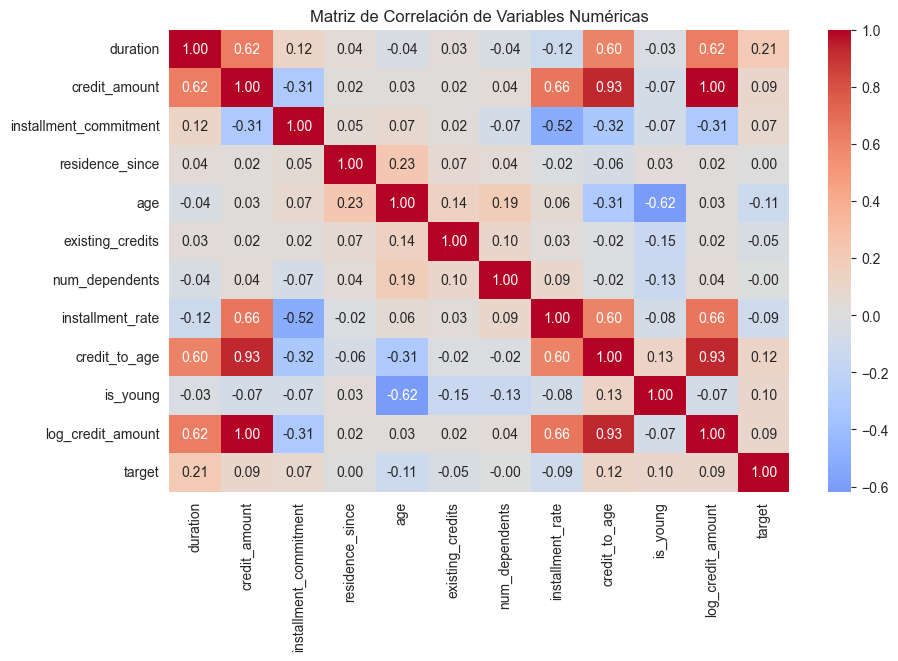

In [57]:
#matriz de correlación de variables numericas
plt.figure(figsize=(10, 6))
corr = df[cols_to_scale + ['target']].corr(method='spearman')
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Modeling - Logistic Regression

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       140
           1       0.57      0.82      0.67        60

    accuracy                           0.76       200
   macro avg       0.74      0.78      0.74       200
weighted avg       0.80      0.76      0.77       200

ROC-AUC Score Train: 0.8341
ROC-AUC Score Test: 0.8151

--- COSTO TOTAL EN TEST SET: 92 ---


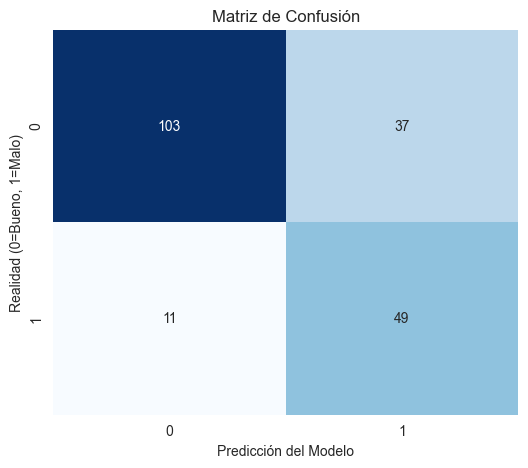

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. DEFINIMOS LA FUNCIÓN DE COSTO DE NEGOCIO
def german_credit_cost(y_true, y_pred):
    """
    Calcula el costo total basado en la matriz de costos del dataset German Credit.
    Costos:
    - Falso Positivo (FP): Predice Malo (1), es Bueno (0) -> Costo 1
    - Falso Negativo (FN): Predice Bueno (0), es Malo (1) -> Costo 5
    """
    cm = confusion_matrix(y_true, y_pred)
    # La matriz de confusión en sklearn es:
    # [[TN, FP],
    #  [FN, TP]]

    # Si el modelo es muy malo o muy bueno y no predice alguna clase, la matriz puede cambiar de forma
    # así que aseguramos extraer los valores correctamente.
    tn, fp, fn, tp = cm.ravel()

    total_cost = (fp * 1) + (fn * 5)
    return total_cost

# 1. Configurar el modelo
# class_weight='balanced' castiga más los errores en la clase minoritaria (Default)
# solver='liblinear' suele ir bien con datasets pequeños
log_reg = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear')

# 2. Entrenar
log_reg.fit(X_train, y_train)

# 3. Predecir
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1] # Probabilidad de ser "Malo" (1)

y_train_prob = log_reg.predict_proba(X_train)[:, 1] # Probabilidad de ser "Malo" (1)

# 4. Visualizar Resultados
print("--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score Train: {roc_auc_score(y_train, y_train_prob):.4f}")
print(f"ROC-AUC Score Test: {roc_auc_score(y_test, y_prob):.4f}")
final_cost = german_credit_cost(y_test, y_pred)
print(f"\n--- COSTO TOTAL EN TEST SET: {final_cost} ---")

# Matriz de Confusión visual
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Realidad (0=Bueno, 1=Malo)')
plt.xlabel('Predicción del Modelo')
plt.show()



## Ajustando threshold:

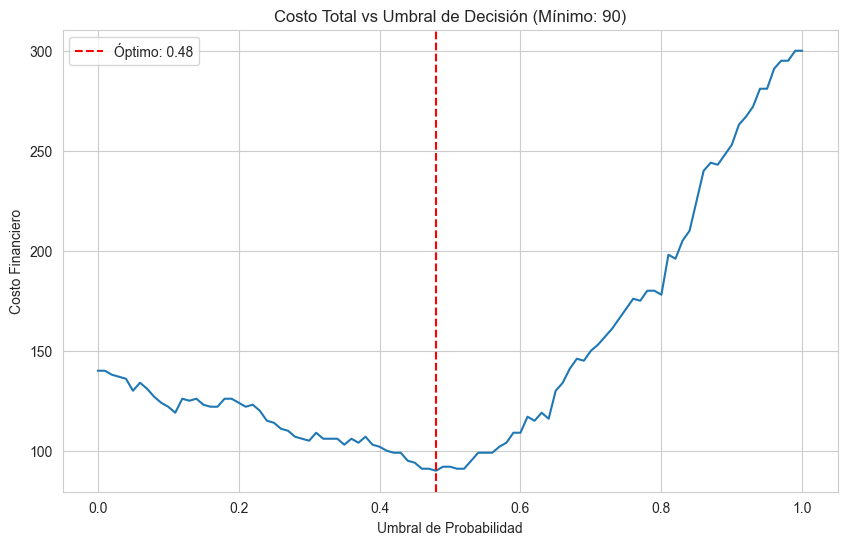

Reducción de costo: De 92 a 90


In [47]:
def find_best_threshold(model, X_test, y_test):
    # Obtener probabilidades de la clase positiva (1)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    thresholds = np.arange(0.0, 1.01, 0.01)
    costs = []
    
    for thresh in thresholds:
        # Convertir probabilidad a clase basado en el umbral actual
        y_pred_custom = (y_proba >= thresh).astype(int)
        
        # Calcular costo con tu función existente
        cost = german_credit_cost(y_test, y_pred_custom)
        costs.append(cost)
    
    # Encontrar el óptimo
    min_cost = min(costs)
    best_thresh = thresholds[costs.index(min_cost)]
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, costs)
    plt.axvline(best_thresh, color='r', linestyle='--', label=f'Óptimo: {best_thresh:.2f}')
    plt.title(f'Costo Total vs Umbral de Decisión (Mínimo: {min_cost})')
    plt.xlabel('Umbral de Probabilidad')
    plt.ylabel('Costo Financiero')
    plt.legend()
    plt.show()
    
    return best_thresh, min_cost

# Uso:
best_thresh, min_cost = find_best_threshold(log_reg, X_test, y_test)
print(f"Reducción de costo: De {final_cost} a {min_cost}")

## Principales Variables

In [40]:
# Crear un DataFrame con los coeficientes
coeffs = pd.DataFrame({
    'Variable': X_train.columns,
    'Peso (Coeficiente)': log_reg.coef_[0]
}).sort_values(by='Peso (Coeficiente)', ascending=False)

# Mostrar los 5 factores que MÁS aumentan el riesgo
print("--- TOP 5 FACTORES DE RIESGO (Aumentan probabilidad de Default) ---")
print(coeffs.head(5))

print("\n--- TOP 5 FACTORES PROTECTORES (Disminuyen probabilidad de Default) ---")
# Mostrar los 5 factores que MÁS disminuyen el riesgo (los más negativos)
print(coeffs.tail(5).sort_values(by='Peso (Coeficiente)', ascending=True))

--- TOP 5 FACTORES DE RIESGO (Aumentan probabilidad de Default) ---
                                  Variable  Peso (Coeficiente)
51                      foreign_worker_Yes            1.102353
21                       purpose_Education            0.981995
46                            housing_Rent            0.828339
42  property_magnitude_Unknown/No Property            0.667387
25                         purpose_Repairs            0.607781

--- TOP 5 FACTORES PROTECTORES (Disminuyen probabilidad de Default) ---
                         Variable  Peso (Coeficiente)
13    checking_status_No checking           -1.194564
14  credit_history_Critical/Other           -1.014795
43       other_payment_plans_None           -0.839042
29     savings_status_gt= 1000 DM           -0.837723
19             purpose_Car (used)           -0.799839


# Regresion Logistica + Hiperparametrización + Funcion de costos


Iniciando optimización de hiperparámetros basada en Costo...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Mejores parámetros encontrados: {'C': 0.095, 'class_weight': {0: 1, 1: 5}, 'solver': 'liblinear'}
Mejor Score (Costo Negativo promedio): -80.80

--- COSTO TOTAL EN TEST SET: 104 ---
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       140
           1       0.43      0.88      0.58        60

    accuracy                           0.62       200
   macro avg       0.67      0.70      0.62       200
weighted avg       0.77      0.62      0.63       200

ROC-AUC Score Train: 0.8290
ROC-AUC Score Test: 0.8164


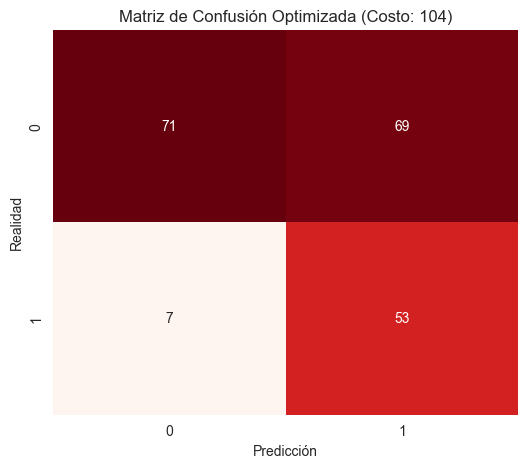

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix

# 2. CREAMOS EL SCORER PARA GRIDSEARCH
# greater_is_better=False porque queremos MINIMIZAR el costo
cost_scorer = make_scorer(german_credit_cost, greater_is_better=False)

# 3. CONFIGURAMOS LA BÚSQUEDA DE HIPERPARÁMETROS (GRID SEARCH)
# Aquí probaremos dos cosas críticas:
# 'C': La fuerza de regularización.
# 'class_weight': Probaremos un peso manual 1:5 (basado en el costo)
param_grid = {
    'C': [0.080, 0.085, 0.090, 0.095, 0.1],
    'solver': ['liblinear'], # Bueno para datasets pequeños
    'class_weight': [{0: 1, 1: 5}, {0: 3, 1: 7}, 'balanced']
}

# Inicializamos el modelo base
lr = LogisticRegression(random_state=42, max_iter=1000)

# Configuramos el GridSearch
# cv=5 significa validación cruzada de 5 pliegues (más robusto)
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring=cost_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1 # Usa todos los núcleos del procesador
)

print("Iniciando optimización de hiperparámetros basada en Costo...")
grid_search.fit(X_train, y_train)

# 4. RESULTADOS
print(f"\nMejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor Score (Costo Negativo promedio): {grid_search.best_score_:.2f}")

# Probamos el mejor modelo en el set de Test
best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test)
y_prob_opt = best_model.predict_proba(X_test)[:, 1] # Probabilidad de ser "Malo" (1)
y_train_prob_opt = best_model.predict_proba(X_train)[:, 1] # Probabilidad de ser "Malo" (1)

# Calculamos el costo real en el set de prueba
final_cost = german_credit_cost(y_test, y_pred_opt)
print(f"\n--- COSTO TOTAL EN TEST SET: {final_cost} ---")
print(classification_report(y_test, y_pred_opt))

print(f"ROC-AUC Score Train: {roc_auc_score(y_train, y_train_prob_opt):.4f}")
print(f"ROC-AUC Score Test: {roc_auc_score(y_test, y_prob_opt):.4f}")

# Visualizamos la matriz de nuevo para ver si bajaron los Falsos Negativos
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_opt), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title(f'Matriz de Confusión Optimizada (Costo: {final_cost})')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

In [49]:
# Crear un DataFrame con los coeficientes
coeffs = pd.DataFrame({
    'Variable': X_train.columns,
    'Peso (Coeficiente)': best_model.coef_[0]
}).sort_values(by='Peso (Coeficiente)', ascending=False)

# Mostrar los 5 factores que MÁS aumentan el riesgo
print("--- TOP 5 FACTORES DE RIESGO (Aumentan probabilidad de Default) ---")
print(coeffs.head(5))

print("\n--- TOP 5 FACTORES PROTECTORES (Disminuyen probabilidad de Default) ---")
# Mostrar los 5 factores que MÁS disminuyen el riesgo (los más negativos)
print(coeffs.tail(5).sort_values(by='Peso (Coeficiente)', ascending=True))

--- TOP 5 FACTORES DE RIESGO (Aumentan probabilidad de Default) ---
                                  Variable  Peso (Coeficiente)
51                      foreign_worker_Yes            0.818801
21                       purpose_Education            0.642011
42  property_magnitude_Unknown/No Property            0.502137
46                            housing_Rent            0.453832
18                       purpose_Car (new)            0.450696

--- TOP 5 FACTORES PROTECTORES (Disminuyen probabilidad de Default) ---
                         Variable  Peso (Coeficiente)
13    checking_status_No checking           -1.041857
14  credit_history_Critical/Other           -0.702048
19             purpose_Car (used)           -0.677307
43       other_payment_plans_None           -0.628494
31  employment_4 lt= x lt 7 years           -0.467044


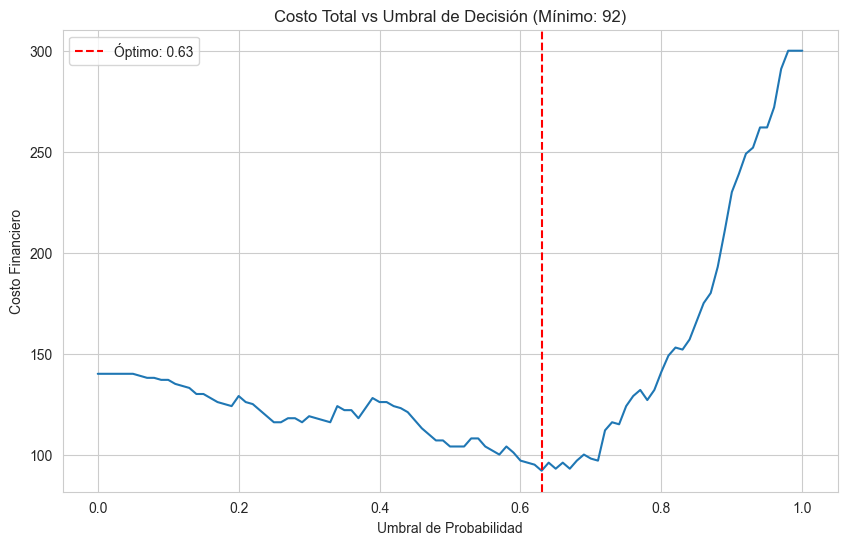

Reducción de costo: De 104 a 92


In [50]:
# Umbrales:
best_thresh, min_cost = find_best_threshold(best_model, X_test, y_test)
print(f"Reducción de costo: De {final_cost} a {min_cost}")

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Definimos listas para guardar resultados y comparar al final
results = []

# --- MODELO 2: RANDOM FOREST ---
print("--- Optimizando Random Forest ---")
rf_params = {
    'n_estimators': [75, 100, 200],
    'max_depth': [3,4, 5, 8], 
    'min_samples_leaf': [3, 5, 8, 10, 12], # Forzar hojas grandes reduce overfitting
    'class_weight': [{0:1, 1:5}, {0:1, 1:7}], # Pesos manuales fuertes
    'bootstrap': [True, False],
    'min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    scoring=cost_scorer,
    cv=5,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

# Guardamos resultados del RF
rf_best = rf_grid.best_estimator_
rf_cost = german_credit_cost(y_test, rf_best.predict(X_test))
results.append({'Modelo': 'Random Forest', 'Costo Total': rf_cost, 'Best Params': rf_grid.best_params_})
print(f"Mejor RF Costo: {rf_cost}")

print(f"\nMejores parámetros encontrados: {rf_grid.best_params_}")

y_prob_rf = rf_best.predict_proba(X_test)[:, 1] # Probabilidad de ser "Malo" (1)
y_train_prob_rf = rf_best.predict_proba(X_train)[:, 1] # Probabilidad de ser "Malo" (1)

print(f"ROC-AUC Score Train: {roc_auc_score(y_train, y_train_prob_rf):.4f}")
print(f"ROC-AUC Score Test: {roc_auc_score(y_test, y_prob_rf):.4f}")

--- Optimizando Random Forest ---
Mejor RF Costo: 111

Mejores parámetros encontrados: {'bootstrap': True, 'class_weight': {0: 1, 1: 5}, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
ROC-AUC Score Train: 0.9004
ROC-AUC Score Test: 0.7983


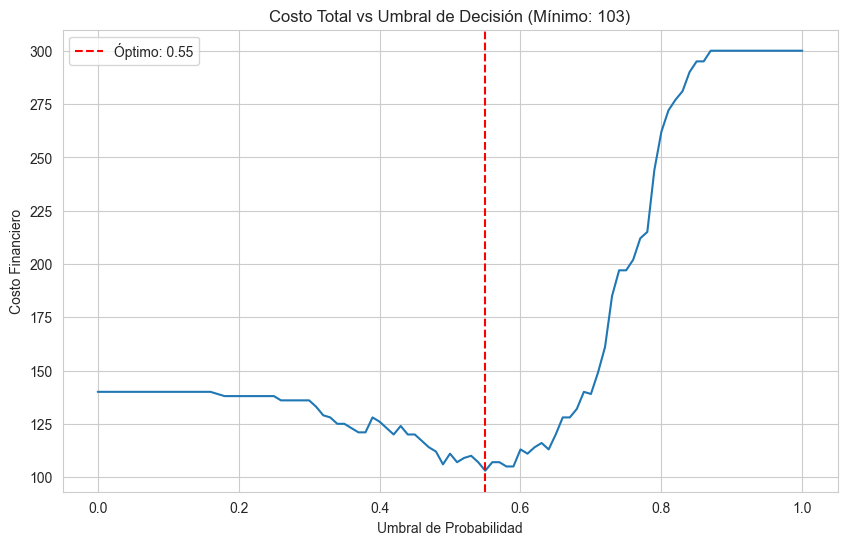

Reducción de costo: De 111 a 103


In [52]:
# Umbrales:
best_thresh, min_cost = find_best_threshold(rf_best, X_test, y_test)
print(f"Reducción de costo: De {rf_cost} a {min_cost}")

# XGBoost


--- Optimizando XGBoost ---
Mejor XGB Costo: 151
ROC-AUC Score: 0.7899

Mejores parámetros encontrados: {'learning_rate': 0.23, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 1}


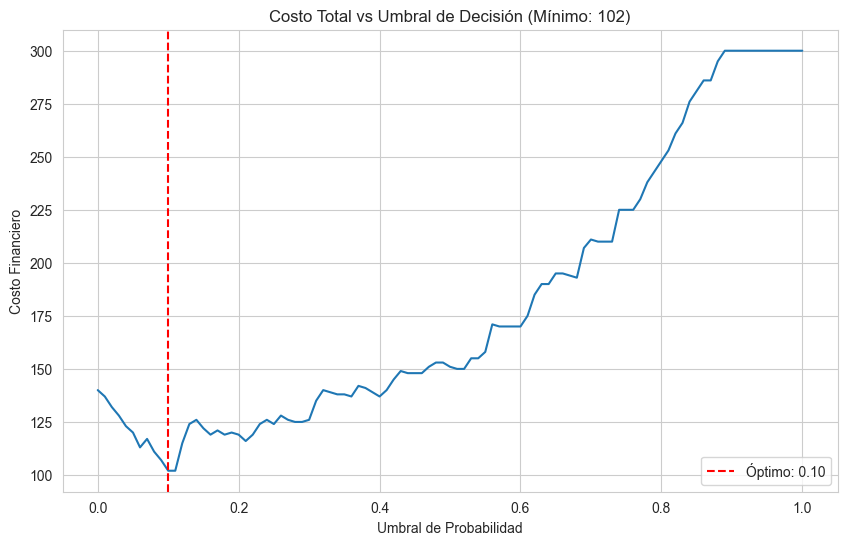

Reducción de costo: De 151 a 102


In [53]:
# --- MODELO 3: XGBOOST ---
print("\n--- Optimizando XGBoost ---")
# Nota: XGBoost requiere que las clases sean numéricas (ya lo hicimos: 0 y 1)
xgb_params = {
    'n_estimators': [25,50,75],
    'learning_rate': [0.230, 0.250, 0.300, 0.400],
    'max_depth': [3,4,5,None],
    # scale_pos_weight: controla el balance.
    # Ratio base aprox es 700/300 = 2.3.
    # Si multiplicamos por costo 5 -> probamos valores altos como 10 o 15.
    'scale_pos_weight': [1,5,10,15] 
}

xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='aucpr'),
    xgb_params,
    cv=5,
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)

# Guardamos resultados del XGB
xgb_best = xgb_grid.best_estimator_
xgb_cost = german_credit_cost(y_test, xgb_best.predict(X_test))
results.append({'Modelo': 'XGBoost', 'Costo Total': xgb_cost, 'Best Params': xgb_grid.best_params_})
print(f"Mejor XGB Costo: {xgb_cost}")
y_prob_xgb = xgb_best.predict_proba(X_test)[:, 1] # Probabilidad de ser "Malo" (1)
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_xgb):.4f}")
print(f"\nMejores parámetros encontrados: {xgb_grid.best_params_}")
# Umbrales:
best_thresh, min_cost = find_best_threshold(xgb_best, X_test, y_test)
print(f"Reducción de costo: De {xgb_cost} a {min_cost}")


--- TABLA DE LIDERAZGO (Menor Costo es Mejor) ---
                Modelo  Costo Total
2  Regresión Logística          104
0        Random Forest          111
1              XGBoost          151


/var/folders/15/59msbdnd3179pytbr6876h9m0000gn/T/ipykernel_31099/3848865541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Costo Total', data=df_results, palette='viridis')


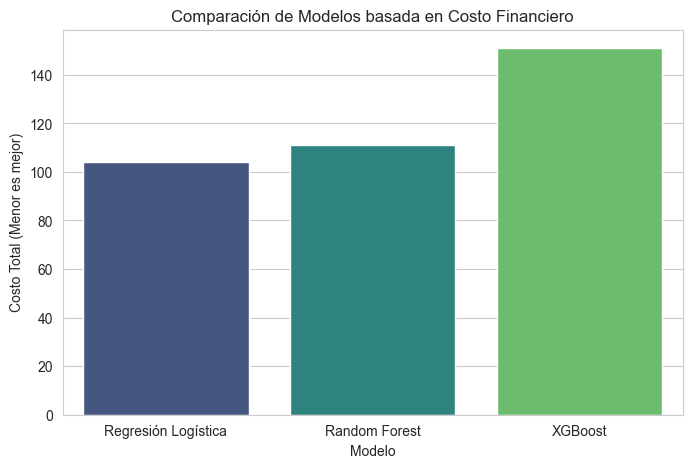

In [45]:
# --- COMPARACIÓN FINAL ---
# Agregamos la Regresión Logística que hicimos antes para comparar
# (Asegúrate de que 'final_cost' del paso anterior siga en memoria, si no, recálculalo)
try:
    results.append({'Modelo': 'Regresión Logística', 'Costo Total': final_cost, 'Best Params': grid_search.best_params_})
except:
    print("Nota: No se encontró el costo de la Regresión Logística en memoria.")

df_results = pd.DataFrame(results).sort_values(by='Costo Total')

print("\n--- TABLA DE LIDERAZGO (Menor Costo es Mejor) ---")
print(df_results[['Modelo', 'Costo Total']])

# Gráfico de barras para el portafolio
plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='Costo Total', data=df_results, palette='viridis')
plt.title('Comparación de Modelos basada en Costo Financiero')
plt.ylabel('Costo Total (Menor es mejor)')
plt.show()